In [ ]:
# 1D CNN in pytorch. 

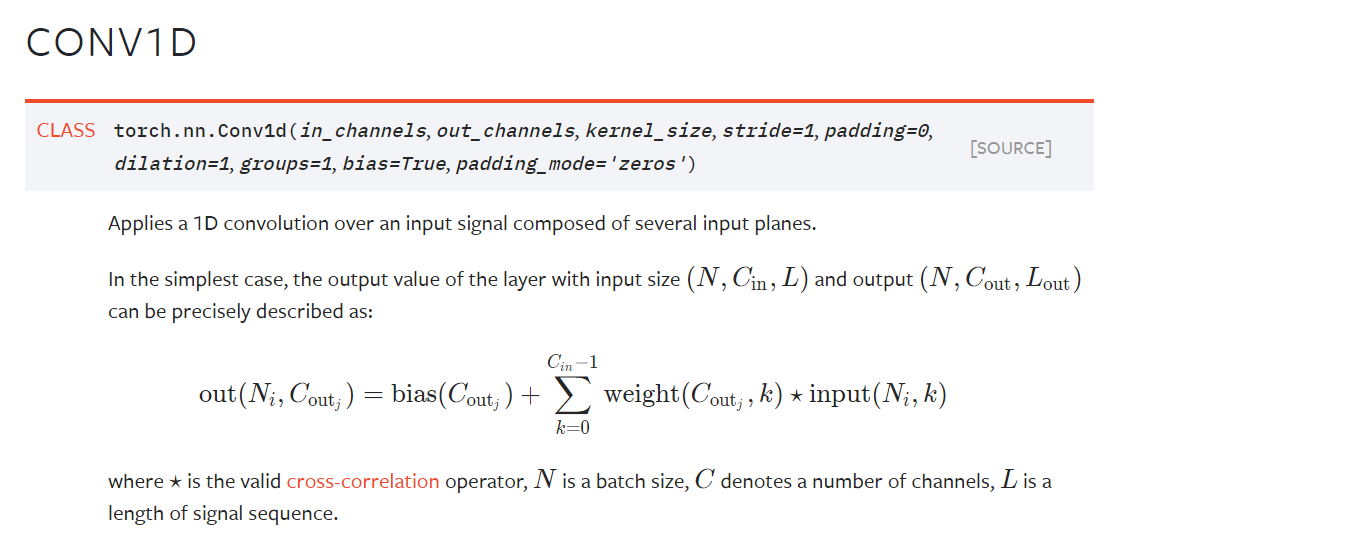

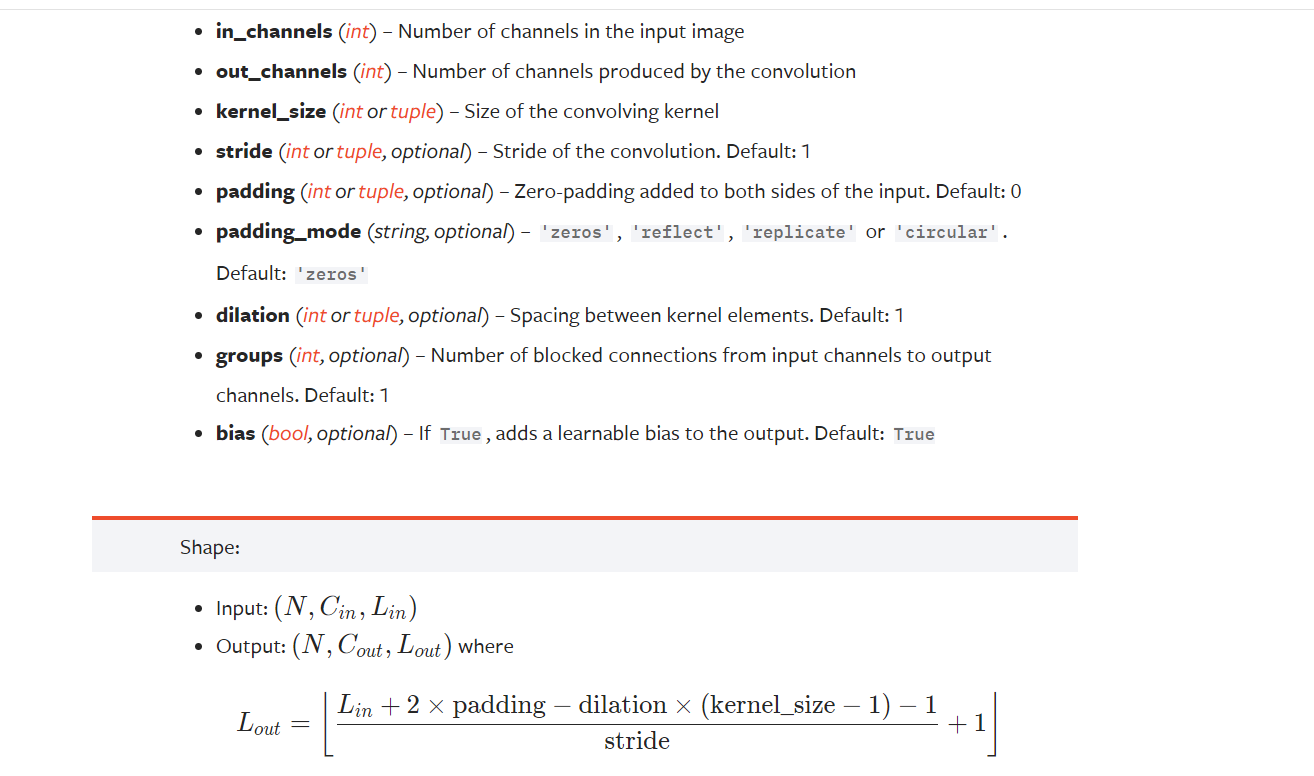

source: (https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html)

In [ ]:
# simple example on  1D CNN in pytorch
import torch
import torch.nn as nn
#test 1D CNN layer
inp=torch.rand(10,3,100) # batch_size,channels or input=3,number of features or length of sequence=100
moduleCNN=nn.Conv1d(in_channels=3,out_channels=10,kernel_size=3)
out=moduleCNN(inp)
print(out.shape)

In [ ]:
# 1D CNN model in pytorch using some layer combinations
import torch.nn as nn
class CNN_model(nn.Module):
  def __init__(self):
    super(CNN_model,self).__init__()
    # block 1
    self.c11=nn.Conv1d(in_channels=10,out_channels=20,kernel_size=3) # 100-3+1=98
    self.maxpool11=nn.MaxPool1d(2) #49
    self.c21=nn.Conv1d(in_channels=20,out_channels=30,kernel_size=5) #49-5+1=45
    self.maxpool21=nn.MaxPool1d(3) #15
    # block2
    self.c12=nn.Conv1d(in_channels=30,out_channels=40,kernel_size=1) #15-1+1
    self.maxpool12=nn.MaxPool1d(3) #15/3=5
    self.c22=nn.Conv1d(in_channels=40,out_channels=50,kernel_size=1) #5-1+1 
    # linear layer
    self.fc=nn.Linear(50*5,10)

  def forward(self,x):
    # block 1 
    x=self.maxpool21(self.c21(self.maxpool11(self.c11(x))))
    
    x=(self.c22(self.maxpool12(self.c12(x))))
    x=x.view(-1,50*5)
    x=self.fc(x)
    return x
 

In [ ]:
# testing the model
modelCNN=CNN_model()  
inp=torch.rand(20,10,100)  # batch_size=10,number_channels=10,number_features=100
out=modelCNN(inp)
print(out.shape) 

torch.Size([20, 10])


In [ ]:
# parameters layers
print(len(list(modelCNN.parameters()))) # we have ten numbers

10


In [ ]:
# check the list of layers that contains the parameters
for i in range(len(list(modelCNN.parameters()))):
    print(list(modelCNN.parameters())[i].size())

torch.Size([20, 10, 3])
torch.Size([20])
torch.Size([30, 20, 5])
torch.Size([30])
torch.Size([40, 30, 1])
torch.Size([40])
torch.Size([50, 40, 1])
torch.Size([50])
torch.Size([10, 250])
torch.Size([10])


In [ ]:
#RNN,GRU and LSTM in Pytorch

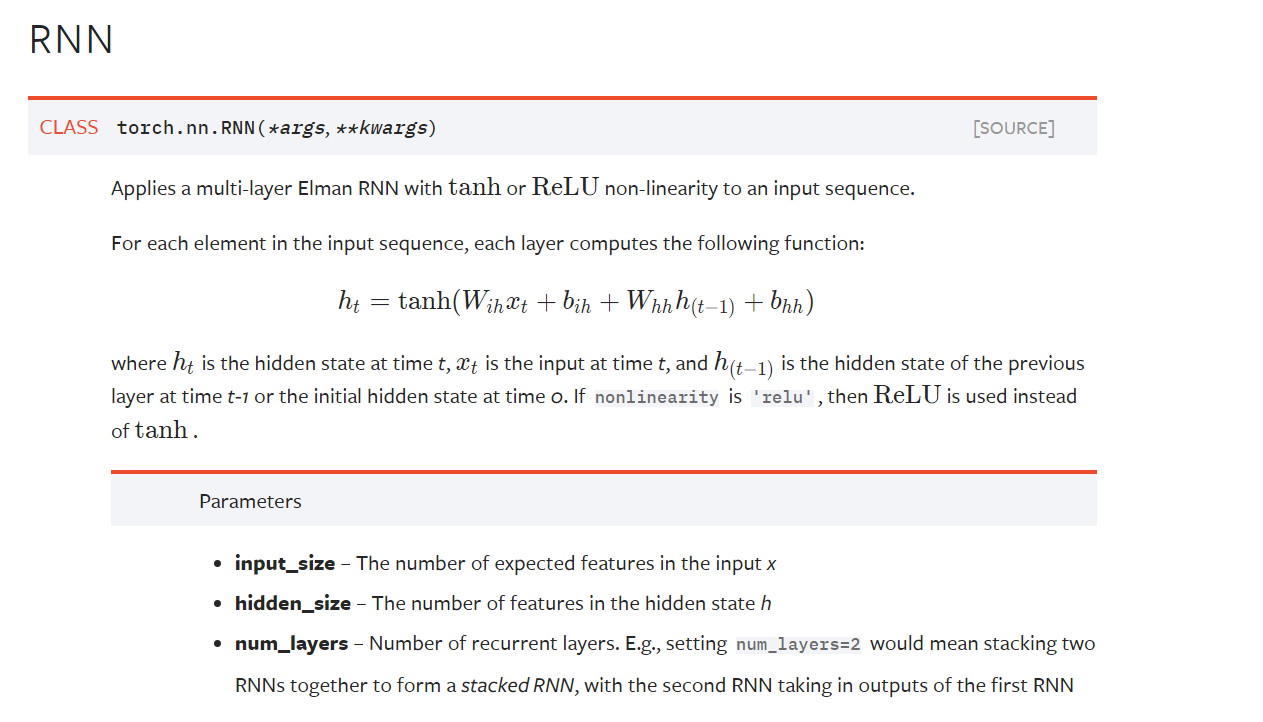

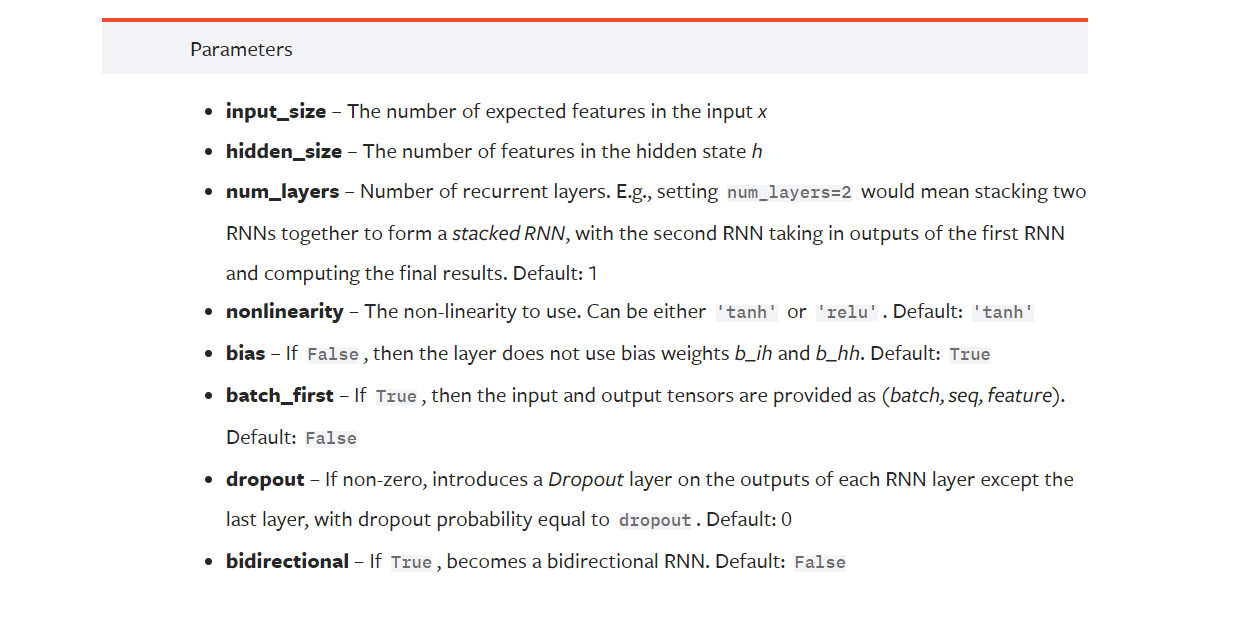

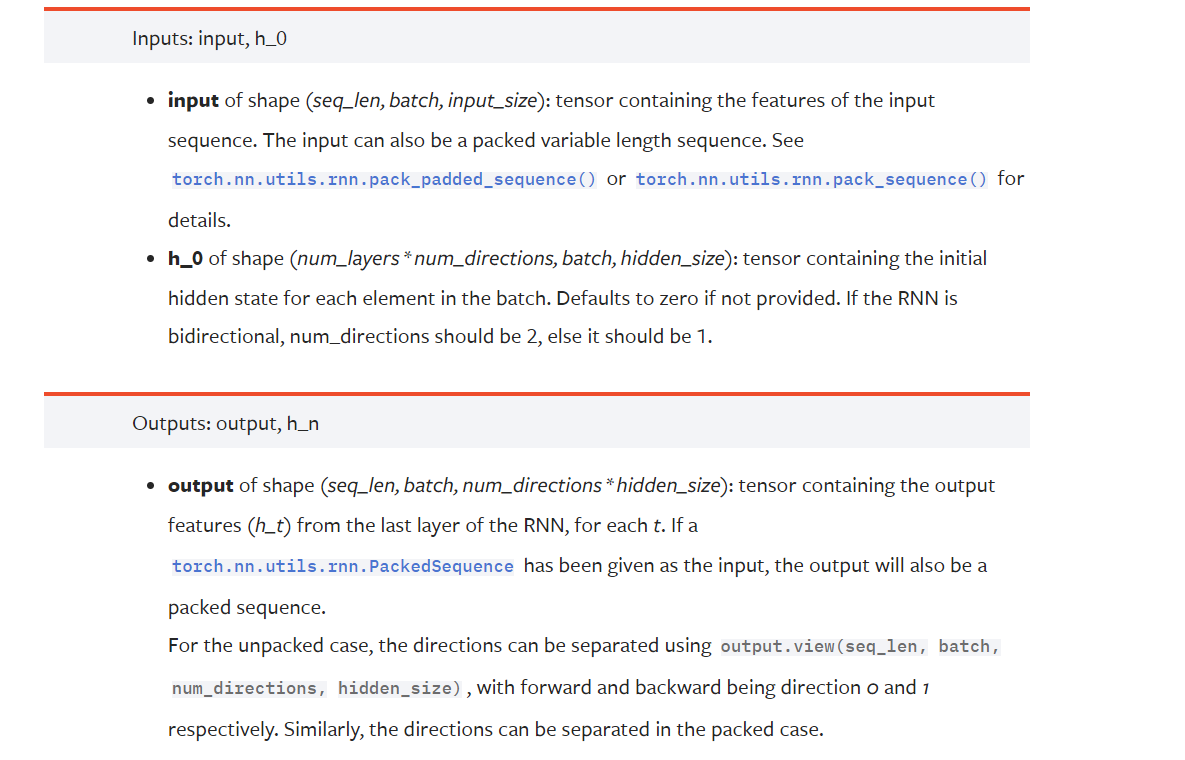

Source: (https://pytorch.org/docs/stable/generated/torch.nn.RNN.html?highlight=rnn#torch.nn.RNN)

In [ ]:
#examples
>>> rnn = nn.RNN(10, 20, 2)
>>> input = torch.randn(5, 3, 10)
>>> h0 = torch.randn(2, 3, 20)
>>> output, hn = rnn(input, h0)

In [4]:
import torch
import torch.nn as nn
rnn=nn.RNN(10,20,2) # input,hidden_number,number of layers
input = torch.randn(5, 3, 10) # input of shape (seq_len, batch, input_size)
h0 = torch.randn(2, 3, 20) #h_0 of shape (num_layers * num_directions, batch, hidden_size)
output, hn = rnn(input, h0)
print(output.shape) # sequence length,batch_size,hidden_dim
print(hn.shape)     # number_layers,batch,hidden_dim

torch.Size([5, 3, 20])
torch.Size([2, 3, 20])


In [7]:
import torch
import torch.nn as nn
rnn=nn.RNN(10,20,2,batch_first=True) # input,hidden_number,number of layers
input = torch.randn(3,5,10) # input of shape (batch,seq_len,input_size)
#h0 = torch.randn(2, 3, 20) #h_0 of shape (num_layers * num_directions, batch, hidden_size)
#h01=torch.randn(3,2,20) #h_0 of shape (num_layers * num_directions, batch, hidden_size)
output, hn = rnn(input, h0)
print(output.shape) # batch_size,sequence length,hidden_dim
print(hn.shape)     # number_layers,batch,hidden_dim

torch.Size([3, 5, 20])
torch.Size([2, 3, 20])


In [16]:
# two layer RNN network
import torch
import torch.nn as nn
rnn1=nn.RNN(10,20,2,batch_first=True) # input,hidden_number,number of layers
rnn2=nn.RNN(20,10,2,batch_first=True) # input,hidden_numbers,number of layers
input = torch.randn(3,5,10) # input of shape (batch,seq_len,input_size)
h0 = torch.randn(2, 3, 20) #h_0 of shape (num_layers * num_directions, batch, hidden_size) # 20
h01=torch.randn(2,3,10) #h_0 of shape (num_layers * num_directions, batch, hidden_size_dim) #10
output1, hn1 = rnn1(input, h0)
output2, hn2 = rnn2(output1, h01)
print(output1.shape) # batch_size,sequence length,hidden_dim
print(hn1.shape)     # number_layers,batch,hidden_di
print(output2.shape) # batch_size,sequence length,hidden_dim
print(hn2.shape)     # number_layers,batch,hidden_di
print(hn2.shape[0])

torch.Size([3, 5, 20])
torch.Size([2, 3, 20])
torch.Size([3, 5, 10])
torch.Size([2, 3, 10])
2


In [18]:
# define in the class way
class RNNmodule(nn.Module):
  def __init__(self,input_size,hidden_size1,hidden_size2,numer_layers=2):
    super().__init__()
    self.numer_layers=numer_layers
    self.hidden_size1=hidden_size1
    self.hidden_size2=hidden_size2
    
    self.rnn1=nn.RNN(input_size,hidden_size1,2,batch_first=True)
    self.rnn2=nn.RNN(hidden_size1,hidden_size2,2,batch_first=True)

  def forward(self,x):
    h0=torch.randn(self.numer_layers,x.shape[0],self.hidden_size1)
    h1=torch.randn(self.numer_layers,x.shape[0],self.hidden_size2)
    output1, hn1 = self.rnn1(x, h0)
    output2, hn2 = self.rnn2(output1, h01)
    print(output1.shape)
    print(hn1.shape) # layers,btach_size,hidden_size this is same as h0 shape
    print(output2.shape) # batch_size,sequence_length,hidden_size
    print(hn2.shape) # same shape as h1=hn2
    return output2
model=RNNmodule(10,20,10)
input=torch.randn(3,5,10) # batch_size,sequence_length=5,input_size=10
output=model(input)

torch.Size([3, 5, 20])
torch.Size([2, 3, 20])
torch.Size([3, 5, 10])
torch.Size([2, 3, 10])


In [33]:
# define in the class way and get output only with hidden size and batch size
class RNNmodule(nn.Module):
  def __init__(self,input_size,hidden_size1,hidden_size2,numer_layers=4):
    super().__init__()
    self.numer_layers=numer_layers
    self.hidden_size1=hidden_size1
    self.hidden_size2=hidden_size2
    
    self.rnn1=nn.RNN(input_size,hidden_size1,numer_layers,batch_first=True)
    self.rnn2=nn.RNN(hidden_size1,hidden_size2,numer_layers,batch_first=True)

  def forward(self,x):
    h0=torch.randn(self.numer_layers,x.shape[0],self.hidden_size1)
    h1=torch.randn(self.numer_layers,x.shape[0],self.hidden_size2)
    output1, hn1 = self.rnn1(x, h0)
    output2, hn2 = self.rnn2(output1, h1)
    print(output1.shape)
    print(hn1.shape) # layers,btach_size,hidden_size this is same as h0 shape
    print(output2[:,-1,:].shape) # batch_size*hidden_size, we can pass this output to any FC layer
    #print(hn2.shape) # same shape as h1=hn2
    return output2
model=RNNmodule(10,20,10)
input=torch.randn(3,5,10) # batch_size,sequence_length=5,input_size=10
output=model(input)

torch.Size([3, 5, 20])
torch.Size([4, 3, 20])
torch.Size([3, 10])


In [34]:
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
  print(list(model.parameters())[i].size())

RNNmodule(
  (rnn1): RNN(10, 20, num_layers=4, batch_first=True)
  (rnn2): RNN(20, 10, num_layers=4, batch_first=True)
)
32
torch.Size([20, 10])
torch.Size([20, 20])
torch.Size([20])
torch.Size([20])
torch.Size([20, 20])
torch.Size([20, 20])
torch.Size([20])
torch.Size([20])
torch.Size([20, 20])
torch.Size([20, 20])
torch.Size([20])
torch.Size([20])
torch.Size([20, 20])
torch.Size([20, 20])
torch.Size([20])
torch.Size([20])
torch.Size([10, 20])
torch.Size([10, 10])
torch.Size([10])
torch.Size([10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10])
torch.Size([10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10])
torch.Size([10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10])
torch.Size([10])


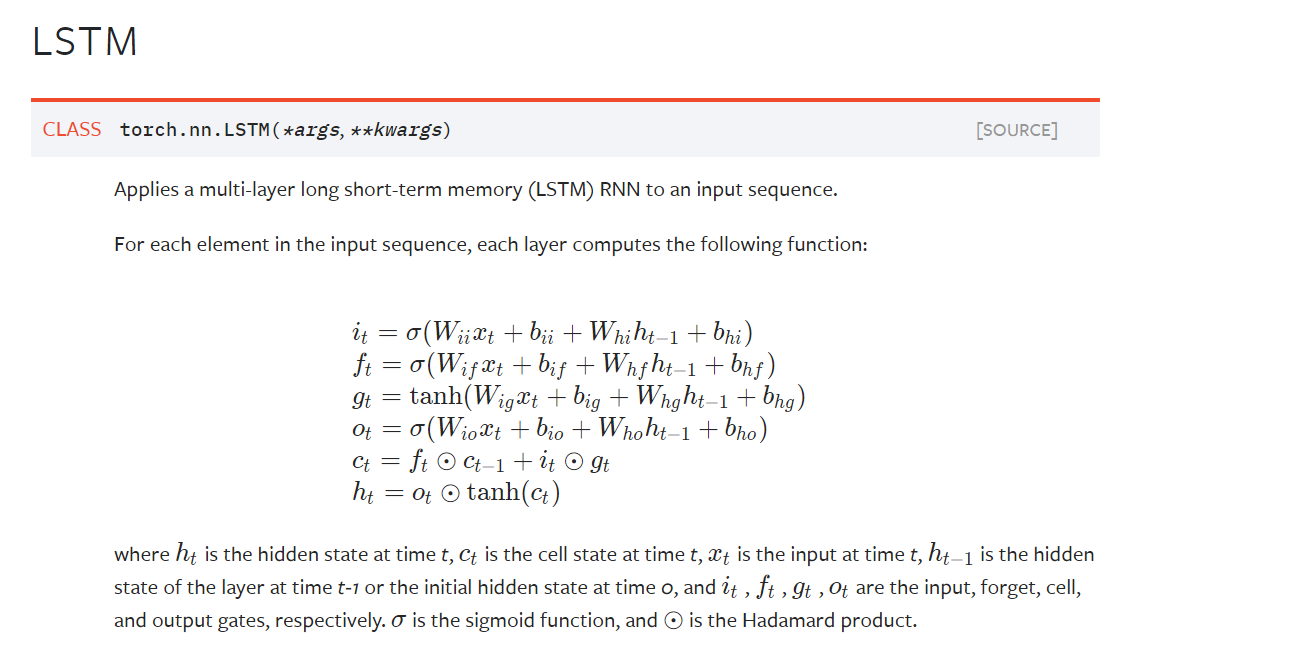

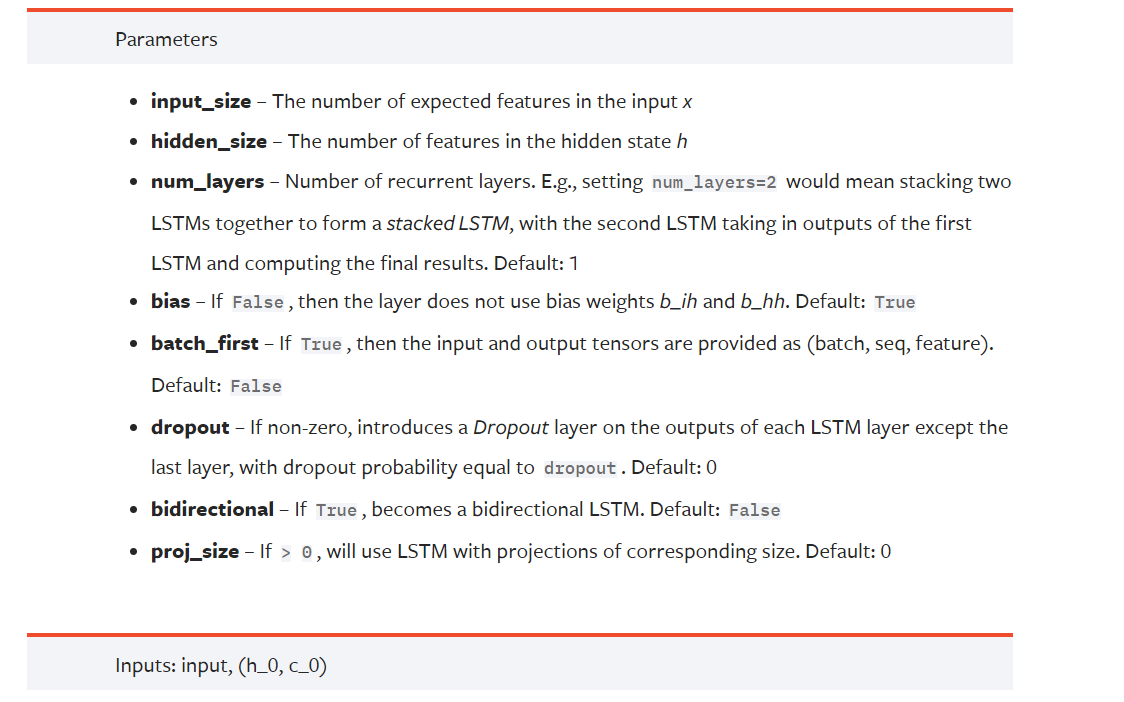

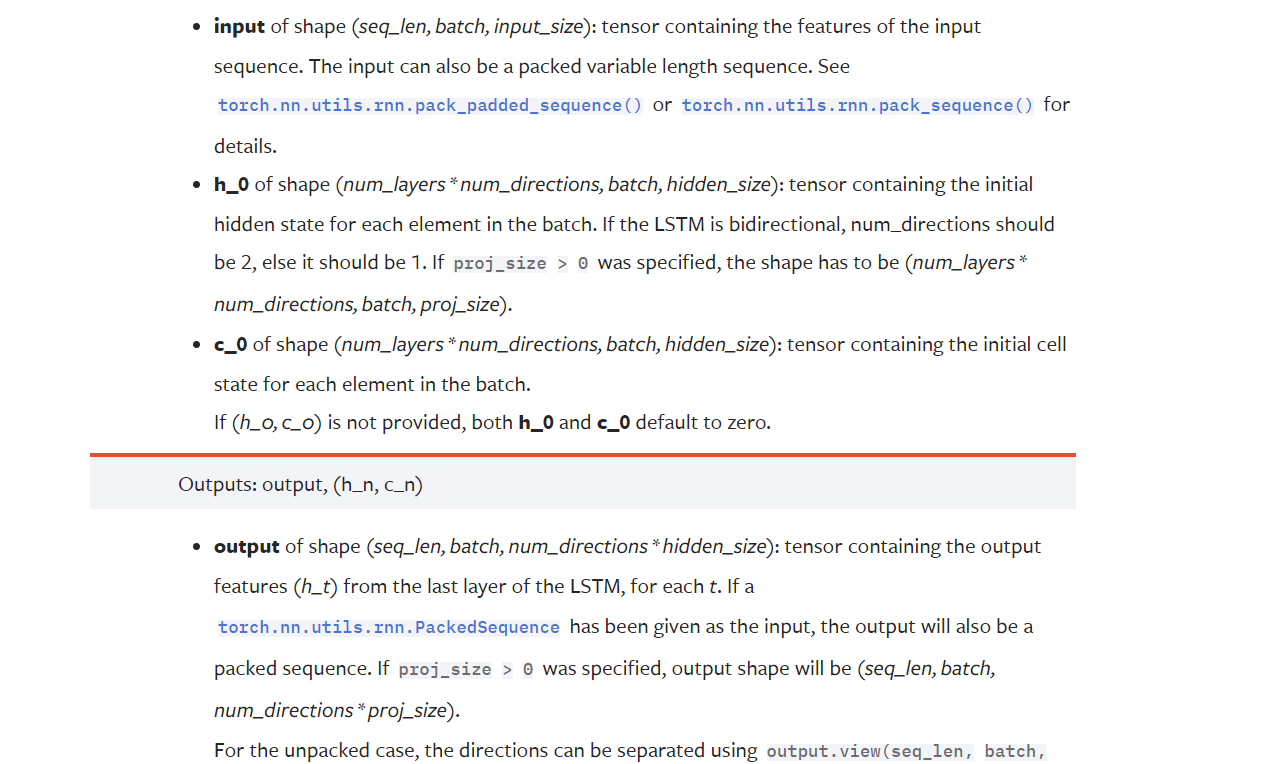

Source: (https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html?highlight=lstm#torch.nn.LSTM)

In [42]:
# LSTM example in pytorch
import torch 
import torch.nn as nn

inpt=torch.randn(2,10,5) # sequence_length,batch_size,input_feature
LSTMmodule=nn.LSTM(5,20,2) # input_length,hidden_size,number_layers
h0=torch.zeros(2,10,20) # number_layers,batch_size,number_hiddens layers
c0=torch.zeros(2,10,20) # number_layers,batch_size,number_hiddens layers
out,(h1,c1)=LSTMmodule(inpt,(h0,c0))
print(out.shape)

torch.Size([2, 10, 20])


In [54]:
# LSTM example in pytorch
import torch 
import torch.nn as nn

inpt=torch.randn(10,20,5) # batch_size,sequence_length,input_feature
LSTMmodule=nn.LSTM(5,20,2, batch_first=True) # input_length,hidden_size,number_layers
h0=torch.zeros(2,10,20) # number_layers,batch_size,number_hiddens layers
c0=torch.zeros(2,10,20) # number_layers,batch_size,number_hiddens layers
out,(h1,c1)=LSTMmodule(inpt,(h0,c0))
print(out[:,-1,:].shape)

torch.Size([10, 20])


In [47]:
# LSTM example in pytorch with batch_size in middle
import torch 
import torch.nn as nn

inpt=torch.randn(2,10,5) # sequence_length,batch_size,input_feature

LSTMmodule1=nn.LSTM(5,20,2) # input_length,hidden_size,number_layers
h01=torch.zeros(2,10,20) # number_layers,batch_size,number_hiddens layers
c01=torch.zeros(2,10,20) # number_layers,batch_size,number_hiddens layers

LSTMmodule2=nn.LSTM(20,20,2) # input_length,hidden_size,number_layers
h02=torch.zeros(2,10,20) # number_layers,batch_size,number_hiddens layers
c02=torch.zeros(2,10,20) # number_layers,batch_size,number_hiddens layers


out1,(h1,c1)=LSTMmodule(inpt,(h01,c01))
out2,(h2,c2)=LSTMmodule2(out1,(h02,c02))
print(out1.shape)
print(out2.shape)

torch.Size([2, 10, 20])
torch.Size([2, 10, 20])


In [51]:
# LSTM example in pytorch with batch_size in first dimension
import torch 
import torch.nn as nn

inpt=torch.randn(10,2,5) # sequence_length,batch_size,input_feature

LSTMmodule1=nn.LSTM(5,20,2,batch_first=True) # input_length,hidden_size,number_layers
h01=torch.zeros(2,10,20) # number_layers,batch_size,number_hiddens layers
c01=torch.zeros(2,10,20) # number_layers,batch_size,number_hiddens layers

LSTMmodule2=nn.LSTM(20,20,2,batch_first=True) # input_length,hidden_size,number_layers
h02=torch.zeros(2,10,20) # number_layers,batch_size,number_hiddens layers
c02=torch.zeros(2,10,20) # number_layers,batch_size,number_hiddens layers


out1,(h1,c1)=LSTMmodule1(inpt,(h01,c01))
out2,(h2,c2)=LSTMmodule2(out1,(h02,c02))
print(out1.shape)
print(out2.shape)

torch.Size([10, 2, 20])
torch.Size([10, 2, 20])


In [57]:
class LSTMmodule(nn.Module):
  def __init__(self,input_size,h1,h2,number_layers=2):
    super().__init__()
    self.input_size=input_size
    self.h1=h1
    self.h2=h2
    self.number_layers=number_layers
    self.lstm1=nn.LSTM(input_size,h1,number_layers,batch_first=True)
    self.lstm2=nn.LSTM(h1,h2,number_layers,batch_first=True)

  def forward(self,x):
    c01,h01=torch.zeros(self.number_layers,x.size(0),self.h1),torch.zeros(self.number_layers,x.size(0),self.h1)
    c02,h02=torch.zeros(self.number_layers,x.size(0),self.h2),torch.zeros(self.number_layers,x.size(0),self.h2)

    out1,(c1,h1)=self.lstm1(x,(c01,h01))
    out2,(c2,h2)=self.lstm2(out1,(c02,h02))
    print(out2.shape) # batch_size,sequence_length,number_of hiddens h2
    return out2
model=LSTMmodule(10,20,10,2)
inpt=torch.randn(5,7,10) # batch_size,seq_len=7,input_size=10
out=model(inpt)
print(out.shape)

torch.Size([5, 7, 10])


In [59]:
class LSTMmodule(nn.Module):
  def __init__(self,input_size,h1,h2,number_layers=2):
    super().__init__()
    self.input_size=input_size
    self.h1=h1
    self.h2=h2
    self.number_layers=number_layers
    self.lstm1=nn.LSTM(input_size,h1,number_layers,batch_first=True)
    self.lstm2=nn.LSTM(h1,h2,number_layers,batch_first=True)

  def forward(self,x):
    c01,h01=torch.zeros(self.number_layers,x.size(0),self.h1),torch.zeros(self.number_layers,x.size(0),self.h1)
    c02,h02=torch.zeros(self.number_layers,x.size(0),self.h2),torch.zeros(self.number_layers,x.size(0),self.h2)

    out1,(c1,h1)=self.lstm1(x,(c01,h01))
    out2,(c2,h2)=self.lstm2(out1,(c02,h02))
    print(out2[:,-1,:].shape) # batch_size,hidden_out
    return out2[:,-1,:]
model=LSTMmodule(10,20,10,2)
inpt=torch.randn(5,7,10) # batch_size,seq_len=7,input_size=10
out=model(inpt)
#print(out.shape)

torch.Size([5, 10])


In [63]:
print(len(list(model.parameters())))

for i in range(len(list(model.parameters()))):
  print(list(model.parameters())[i].size())
  #print(i)

16
torch.Size([80, 10])
torch.Size([80, 20])
torch.Size([80])
torch.Size([80])
torch.Size([80, 20])
torch.Size([80, 20])
torch.Size([80])
torch.Size([80])
torch.Size([40, 20])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])
torch.Size([40, 10])
torch.Size([40, 10])
torch.Size([40])
torch.Size([40])


In [ ]:
#GRU in Pytorch

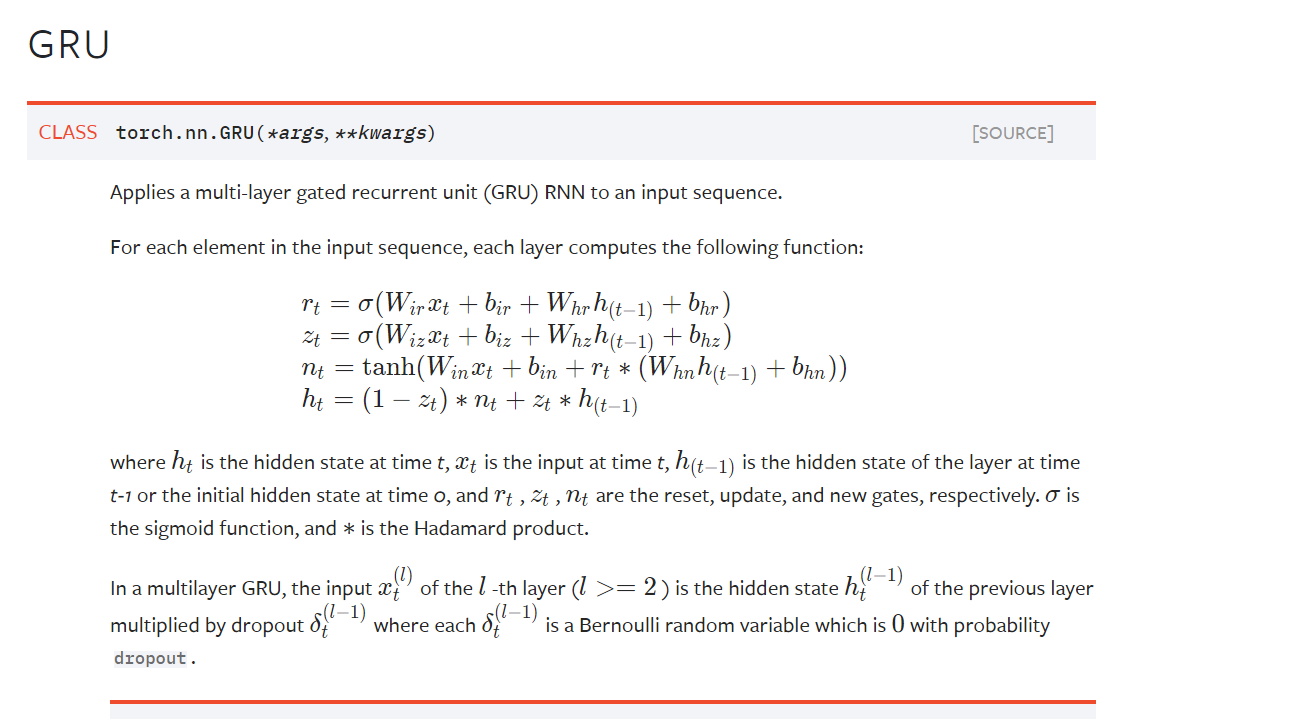

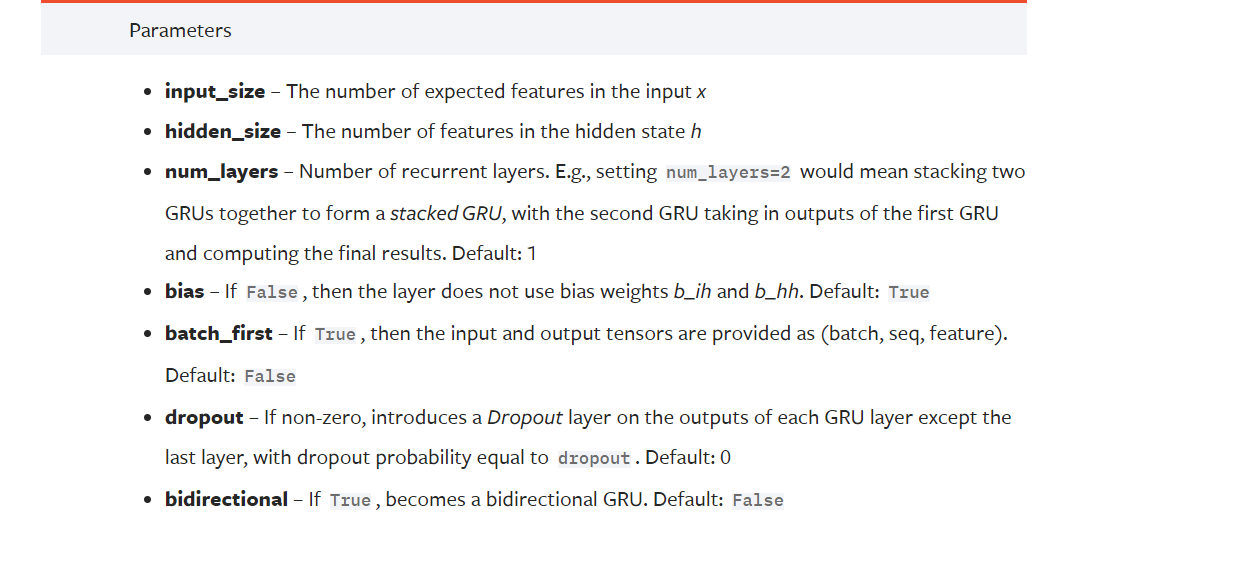

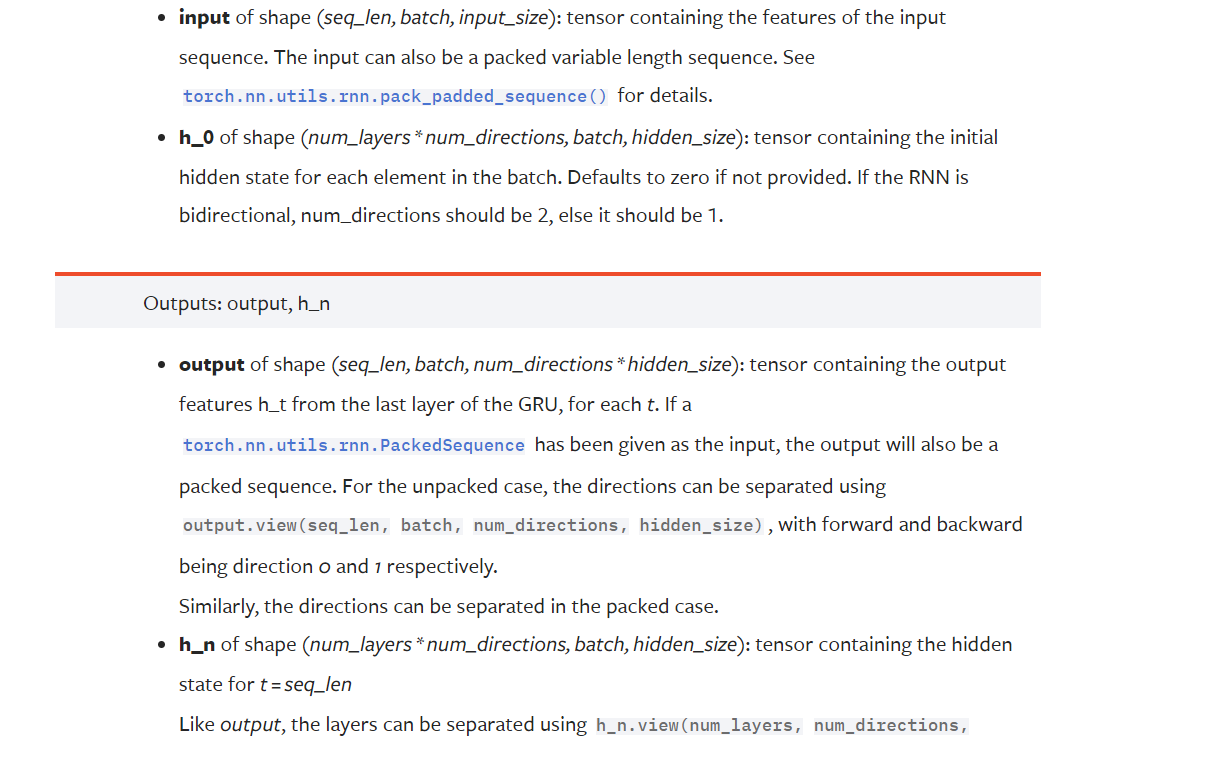

Source: (https://https://pytorch.org/docs/stable/generated/torch.nn.GRU.html?highlight=gru#torch.nn.GRU)

In [64]:
import torch
import torch.nn as nn
inpt=torch.randn(10,5,15) # sequence_lenght,batch_size,input_length
gru=nn.GRU(15,10,2) # input_size,number_hidden,number of layers
h0=torch.zeros(2,5,10)
out,h1=gru(inpt,h0) # seq_len,batch_size,number_hidden units
print(out.shape)

torch.Size([10, 5, 10])


In [67]:
# batch_first
import torch
import torch.nn as nn
inpt=torch.randn(5,10,15) # batch_size,sequence_length,input_length
gru=nn.GRU(15,20,2,batch_first=True) # input_size,number_hidden,number of layers
h0=torch.zeros(2,5,20)
out,h1=gru(inpt,h0) # batch_size,seq_length,number_hidden units
print(out.shape)

torch.Size([5, 10, 20])


In [69]:
class GRUmodule(nn.Module):
  def __init__(self,input_size,h1,h2,number_layers=2):
    super().__init__()
    self.input_size=input_size
    self.h1=h1
    self.h2=h2
    self.number_layers=number_layers
    self.gru1=nn.GRU(input_size,h1,self.number_layers,batch_first=True)
    self.gru2=nn.GRU(h1,h2,self.number_layers,batch_first=True)

  def forward(self,x):
    h01=torch.zeros(self.number_layers,x.size(0),self.h1)
    h1=torch.zeros(self.number_layers,x.size(0),self.h2)
    out1,_=self.gru1(x,h01)
    out2,_=self.gru2(out1,h1)
    print(out2[:,-1,:].shape)
    return out2[:,-1,:]
model=GRUmodule(10,15,20)
inpt=torch.randn(4,5,10)
out=model(inpt)
  

torch.Size([4, 20])


In [71]:
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
  print(list(model.parameters())[i].size())

16
torch.Size([45, 10])
torch.Size([45, 15])
torch.Size([45])
torch.Size([45])
torch.Size([45, 15])
torch.Size([45, 15])
torch.Size([45])
torch.Size([45])
torch.Size([60, 15])
torch.Size([60, 20])
torch.Size([60])
torch.Size([60])
torch.Size([60, 20])
torch.Size([60, 20])
torch.Size([60])
torch.Size([60])


In [88]:
# combination of 1D CNN and LSTM or RNN or GRU layers to make a single model
import torch
import torch.nn as nn
class CNNLSTM(nn.Module):
  def __init__(self,input_size,number_layers,hidden_units,number_classes=5):
    super().__init__()
    self.number_layers=number_layers
    self.hidden_units=hidden_units
    self.input_size=input_size
    self.c1=nn.Conv1d(in_channels=input_size,out_channels=10,kernel_size=3) # 100-1+3=98
    self.b1=nn.BatchNorm1d(10)
    self.mp1=nn.MaxPool1d(2) #98/2=49
    self.c2=nn.Conv1d(10,out_channels=20,kernel_size=5) #49+1-5=45
    self.b2=nn.BatchNorm1d(20)
    self.mp2=nn.MaxPool1d(3) #45/3=15
    # b*20*15
    self.lstm=nn.LSTM(15,self.hidden_units,self.number_layers,batch_first=True)
    self.fc=nn.Linear(self.hidden_units,number_classes)

  def forward(self,x):
    x=self.mp1(self.b1(self.c1(x)))
    x=self.mp2(self.b2(self.c2(x)))
    print(x.shape)
    h0=torch.zeros(self.number_layers,x.size(0),self.hidden_units)
    c0=torch.zeros(self.number_layers,x.size(0),self.hidden_units)
    out,(h1,c1)=self.lstm(x,(h0,c0))
    out1=self.fc(out[:,-1,:]) # batch_size*hidden_units
    print(out1.shape)
    return out1
model=CNNLSTM(1,2,20)
inpt=torch.randn(10,1,100)
out=model(inpt)



torch.Size([10, 20, 15])
torch.Size([10, 5])


In [90]:
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
  print(list(model.parameters())[i].size())

18
torch.Size([10, 1, 3])
torch.Size([10])
torch.Size([10])
torch.Size([10])
torch.Size([20, 10, 5])
torch.Size([20])
torch.Size([20])
torch.Size([20])
torch.Size([80, 15])
torch.Size([80, 20])
torch.Size([80])
torch.Size([80])
torch.Size([80, 20])
torch.Size([80, 20])
torch.Size([80])
torch.Size([80])
torch.Size([5, 20])
torch.Size([5])
